# Baseline
> Conv model

In [3]:
from fastai.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [16]:
set_seed(2021)

In [17]:
torch.cuda.set_device(0)
torch.cuda.get_device_name()

'Quadro RTX 8000'

In [18]:
data_path = Path.home()/'.fastai/data/UCF101-frames'

In [19]:
instances = get_instances(data_path)

## Params

In [20]:
seq_len = 20
step=5
image_size = 128
bs = 16
val_idxs = None

you could put this split on a text file:

In [21]:
dls = get_action_dataloaders(instances, bs=bs, image_size=image_size, seq_len=seq_len, step=step, val_idxs=val_idxs)

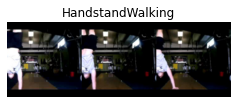

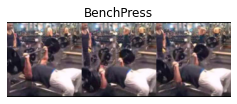

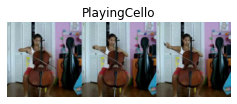

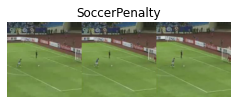

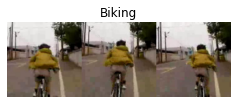

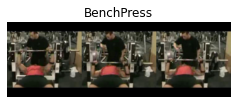

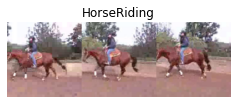

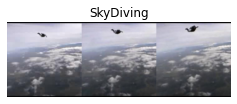

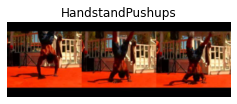

In [24]:
dls.show_batch()

## Train

In [25]:
model = SimpleModel(num_classes=dls.c, seq_len=seq_len)

In [26]:
learn = Learner(dls, model, metrics=[accuracy, top_k_accuracy], wd=0.1, splitter=simple_splitter).to_fp16()
learn.freeze()

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.015848932787775993)

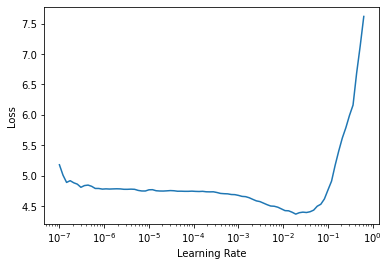

In [15]:
learn.lr_find()

In [27]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.833633,1.736414,0.581456,0.836712,01:30
1,2.129556,1.938520,0.495871,0.786036,01:31
2,1.842305,1.638116,0.563814,0.837462,01:32
3,1.491385,1.273234,0.644144,0.892267,01:34
4,1.152700,0.911924,0.749625,0.937688,01:34
5,0.951058,0.712916,0.807432,0.953453,01:35
6,0.603566,0.478566,0.868994,0.976727,01:35
7,0.362301,0.347930,0.903904,0.983108,01:34
8,0.204098,0.284652,0.927553,0.985736,01:35
9,0.122555,0.279363,0.927177,0.986111,01:35


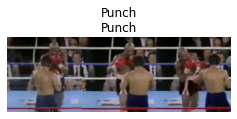

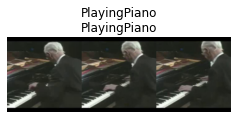

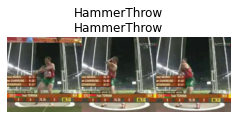

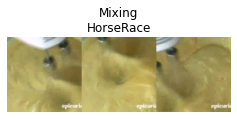

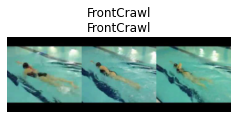

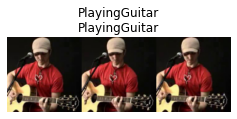

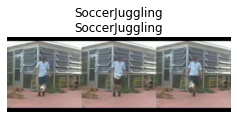

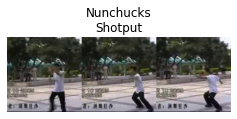

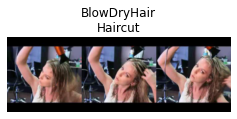

In [28]:
learn.show_results()